# Lab 4 - Classification


- Your name: Lê Khánh linh

- Your student code: 20110377

In [1]:
2%100

2

## 1. Tạo một Simple Logistic Regression với thư viện scikit-learn

Ở phần này, bạn sẽ thực hiện một số công việc sau:

- Đọc và load dữ liệu từ file với hàm `pd.read_csv()` của thư viện `pandas`
- Chia dữ liệu thành train set và test set dùng hàm `train_test_split()` từ thư viện `sklearn`
- Dùng hàm `LogisticRegression` từ thư viện `sklearn` để tạo mô hình hồi quy tuyến tính 
- Fit mô hình trên train set với hàm `fit()`
- Predict trên test set dùng mô hình đã huấn luyện được
- Tính Confusion Matrix (CM) và các độ đo Accuraccy, F1-score dùng hàm `confusion_matrix()`, `accuracy()` và  `f1_score()` từ thư viện `sklearn`
- Vẽ biểu đồ các điểm dữ liệu cùng với các dự đoán của mô hình dùng thư viện `matplotlib`

Bên dưới là các đường link để bạn tham khảo thêm về các hàm đã đề cập ở trên.

- [pd.read_csv(filename)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html): Trả về một pandas dataframe chứa từ file dữ liệu
- [sklearn.train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html): Tách dữ liệu (ngẫu nhiên) thành tập train và test 
- [sklearn.LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): Khởi tạo một linear model
- [LogisticRegression.fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit): Fit một linear model trên train data
- [LogisticRegression.predict()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict): Predict dùng linear model đã tạo
- [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix): Tính confution_matrix (CM)
- [f1_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score): Tính F1-score
- [plt.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html): Vẽ biểu đồ

### 1.1. Tìm hiểu tổng quan về dữ liệu

Phần này sẽ dùng tập dữ liệu `HeartDisease.csv` để minh họa. Chi tiết về tập dữ liệu có thể được tham khảo ở https://archive.ics.uci.edu/ml/datasets/heart+Disease.

#### 1.1.1. Load dữ liệu

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ "HeartDisease.csv"
heart = pd.read_csv('./data/HeartDisease.csv')

#### 1.1.2. Khám phá tổng quan về dữ liệu

In [3]:
heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [4]:
# Gán biến `AHD`, là `y`
y = heart[['AHD']].values

# Gán biến `Age` là `X`
X = heart[['Age']].values

In [5]:
# Chuyển biến `y` sang dạng nhị phân (`AHD` == 'Yes' ứng với 1 và AHD'] == 'No' ứng với 0)
y = 1 * (heart['AHD'] == 'Yes').values
# y=y.reshape(-1,1)

### 1.2. Chia dữ liệu

Ta sẽ chia dữ liệu làm 2 tập train và test với tỷ lệ 80/20.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size =0.2, random_state = 1)

print('Labels counts in y:', len(y))
print('Labels counts in y_train:', len(y_train))
print('Labels counts in y_test:', len(y_test))

Labels counts in y: 303
Labels counts in y_train: 242
Labels counts in y_test: 61


### 1.3. Fit mô hình

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Tạo mô hình Logistic Regression dùng sklearn không dùng penalty
logit = LogisticRegression(penalty = 'none' ,max_iter = 1e5, random_state = 1)

# Fit mô hình với train data
logit.fit(X_train,y_train )

# Predict trên test data dùng mô hình đã train
y_pred_test =logit.predict(X_test)
y_pred_test

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

### 1.4. Đánh giá mô hình

Ta sẽ đánh giá mô hình dùng confusion matrix (CM) và các độ đo accuracy, f1_score, f1_micro, f1_macro.

In [8]:
import sklearn.metrics as metrics

cm_test = metrics.confusion_matrix(y_true =y_test, y_pred = y_pred_test)
print(f'The test confusion matrix is:\n {cm_test}')

accuracy = metrics.accuracy_score(y_true =y_test, y_pred = y_pred_test)
print(f'The test accuracy is: {accuracy}')

f1_score = metrics.f1_score(y_true = y_test, y_pred =y_pred_test, average =None)
print(f'The test f1_score is: {f1_score}')

f1_micro = metrics.f1_score(y_true = y_test, y_pred = y_pred_test,average='micro')
print(f'The test f1_micro is: {f1_micro}')

f1_macro = metrics.f1_score(y_true = y_test, y_pred = y_pred_test,average='macro')
print(f'The test f1_macro is: {f1_macro}')

The test confusion matrix is:
 [[26  8]
 [15 12]]
The test accuracy is: 0.6229508196721312
The test f1_score is: [0.69333333 0.5106383 ]
The test f1_micro is: 0.6229508196721312
The test f1_macro is: 0.6019858156028368


In [9]:
X_train.shape

(242, 1)

### 1.5. Trực quan hóa kết quả

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# x = np.linspace(np.min(X) - 10, np.max(X) + 10, 242)
# x=x.reshape(-1,1)

# yhat_class_logit =logit.predict(x)
# yhat_prob_logit =logit.predict_proba(x)[:, 1]


# # plot the observed data
# plt.plot(X_train,yhat_class_logit , 'o', alpha = 0.1, label = 'Train Data')
# plt.plot(X_test, 0.94 * yhat_class_logit + 0.03, 'o', alpha = 0.1, label = 'Test Data')

# # plot the predictions
# plt.plot(___, ___, label = 'logit Classifications')
# plt.plot(___, ___, label = 'logit Probabilities')

# # put the lower-left part of the legend 5% to the right along the x-axis, and 45% up along the y-axis
# plt.legend(loc = (0.05, 0.45))

# # Don't forget your axis labels!
# plt.xlabel("Age")
# plt.ylabel("Heart disease (AHD)")

# plt.show()

### 1.6. Thay đổi `test_size`

Nếu ở phần chia dữ liệu, bạn thay đổi tham số `test_size = 0.3` thì accuracy và f1_score sẽ thay đổi như thế nào?

In [11]:
# Your answers
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size =0.3, random_state = 1)
logit = LogisticRegression(penalty = 'none' ,max_iter = 1e5, random_state = 1)

# Fit mô hình với train data
logit.fit(X_train,y_train )

# Predict trên test data dùng mô hình đã train
y_pred_test =logit.predict(X_test)
y_pred_test
accuracy = metrics.accuracy_score(y_true =y_test, y_pred = y_pred_test)
print(f'The test accuracy is: {accuracy}')

f1_score = metrics.f1_score(y_true = y_test, y_pred =y_pred_test, average =None)
print(f'The test f1_score is: {f1_score}')

The test accuracy is: 0.6043956043956044
The test f1_score is: [0.67272727 0.5       ]


## 2. Tạo một mô hình Logistic Regression khác với thư viện scikit-learn

In [12]:
# Gán tập gồm các biến 'Age','Sex','MaxHR','RestBP','Chol' là `X`
features = ['Age','Sex','MaxHR','RestBP','Chol']
X = heart[features]

### 1.2. Chia dữ liệu

Ta sẽ chia dữ liệu làm 2 tập train và test với tỷ lệ 70/30.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.3, random_state = 1)

print('Labels counts in y:', len(y))
print('Labels counts in y_train:', len(y_train))
print('Labels counts in y_test:', len(y_test))

Labels counts in y: 303
Labels counts in y_train: 212
Labels counts in y_test: 91


### 2.2. Huấn luyện mô hình

Ta sẽ train 2 mô hình logistic, một mô hình với l2 penalty và một mô hình với no penalty.

In [14]:
logit = LogisticRegression(penalty='none', max_iter = 1e5).fit(X_train, y_train)
logit_ridge = LogisticRegression(penalty='l2', C = 0.01, max_iter = 1e5).fit(X_train, y_train)

### 2.3. Dự đoán và đánh giá các mô hình

In [15]:
# Dự đoán xác xuất và nhãn dựa trên threshold = 0.5 cho test data
y_pred_logit = logit.predict_proba(X_test)[:, 1]
y_pred_logit_ridge = logit_ridge.predict_proba(X_test)[:, 1]

threshold = 0.5

# In ra các confusion matrix
print('The test confusion matrix for logit when cut-off is', threshold, ': \n',
      metrics.confusion_matrix(y_test, y_pred_logit > threshold))
print('The test confusion matrix for logit_ridge when cut-off is', threshold, ': \n',
      metrics.confusion_matrix(y_test, y_pred_logit_ridge > threshold))

The test confusion matrix for logit when cut-off is 0.5 : 
 [[35 14]
 [11 31]]
The test confusion matrix for logit_ridge when cut-off is 0.5 : 
 [[40  9]
 [15 27]]


### 2.4. Trực quan hóa kết quả

Ta sẽ dùng ROC curve để trực quan hóa kết quả của các mô hình.

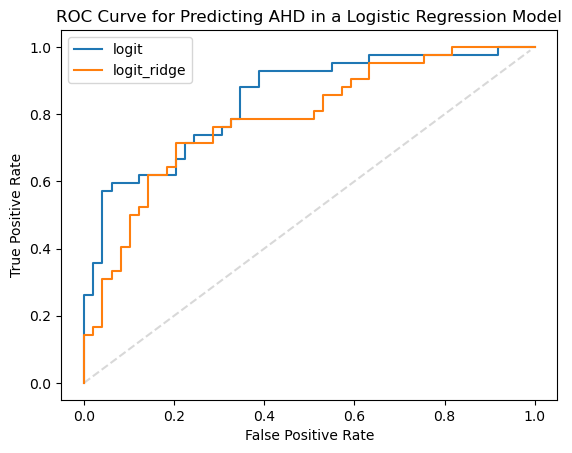

In [16]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_logit)
fpr_ridge, tpr_ridge, thresholds_ridge = metrics.roc_curve(y_test,y_pred_logit_ridge)

x = np.arange(0, 100) / 100
plt.plot(x, x, '--', color = "gray", alpha = 0.3)
plt.plot(fpr,tpr, label = "logit")
plt.plot(fpr_ridge, tpr_ridge, label = "logit_ridge")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for Predicting AHD in a Logistic Regression Model")
plt.legend()
plt.show()

In [17]:
# In ra AUC scores
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit)
auc_logit_ridge = metrics.roc_auc_score(y_test, y_pred_logit_ridge)
print("auc_logit = ", auc_logit)
print("auc_logit_ridge = ", auc_logit_ridge)

auc_logit =  0.8420796890184645
auc_logit_ridge =  0.7871720116618075


## 3. Regularization với Ridge, Lasso, và ElasticNet

### 3.2. Chọn `ADH` là output, tất cả các biến còn lại là input

In [18]:
heart_dropna = heart.dropna()

In [19]:
y=heart_dropna[["AHD"]].values
X=heart_dropna.drop(columns=['AHD','Unnamed: 0'])

In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Chọn biến `ADH` là ouput (chuyển sang dạng nhị phân 0/1), các biến còn lại là input

y=heart_dropna[["AHD"]].values
y = 1 * (heart_dropna['AHD'] == 'Yes').values
X=heart_dropna.drop(columns=['AHD','Unnamed: 0'])

# Categorical features
cat_features = ['ChestPain', 'Thal']

# Mã hóa (encode) các cột categorical thành dạng one-hot
oh_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
oh_cols = pd.DataFrame(oh_encoder.fit_transform(X[cat_features]))

# One-hot encoding removed index; put it back
oh_cols.index = X.index

# Remove categorical columns (will replace with one-hot encoding)
num_cols = X.drop(columns=cat_features, axis = 1)

# Add one-hot encoded columns to numerical columns
oh_X = pd.concat([num_cols,oh_cols], axis = 1)

oh_X.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,0,1,2,3,4,5,6
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [21]:
len(y)

297

### 3.3. Tách dữ liệu thành train và test set

Tách dữ liệu thành train và test set với tỷ lệ 80/20 trên dữ liệu sau khi đã encode các biến categorical.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    oh_X, y, test_size =0.2, random_state = 1)

In [23]:
print(len(y_test))

60


In [24]:
print(len(y_train))

237


### 3.4. Áp dụng mô hình Logistic Regression dùng thư viện scikit-learn

In [25]:
# Khởi tạo một Linear Regression model
logit = LogisticRegression(penalty = 'none', max_iter = 1e4)

# Fit model trên train data
logit.fit(X_train, y_train)

# Predict trên test data
y_test_pred = logit.predict(X_test)

### 3.5. Đánh giá mô hình

In [26]:
cm_test = metrics.confusion_matrix(y_true =y_test, y_pred = y_test_pred)
print(f'The test confusion matrix is:\n {cm_test}')

accuracy = metrics.accuracy_score(y_true =y_test, y_pred = y_test_pred)
print(f'The test accuracy is: {accuracy}')

f1_score = metrics.f1_score(y_true = y_test, y_pred =y_test_pred, average =None)
print(f'The test f1_score is: {f1_score}')

f1_micro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred,average='micro')
print(f'The test f1_micro is: {f1_micro}')

f1_macro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred,average='macro')
print(f'The test f1_macro is: {f1_macro}')

The test confusion matrix is:
 [[24  6]
 [ 6 24]]
The test accuracy is: 0.8
The test f1_score is: [0.8 0.8]
The test f1_micro is: 0.8000000000000002
The test f1_macro is: 0.8000000000000002


### 3.6. In ra các hệ số của Linear Regression model

In [27]:
import numpy as np

# Tạo một dictionary cho các coefficient với tên biến là các key
logit_coef = dict(zip(X.columns, np.transpose(logit.coef_[0])))
logit_coef

{'Age': -0.021559257504220653,
 'Sex': 1.7166877992005813,
 'ChestPain': 0.03797901800419046,
 'RestBP': 0.006964380260632037,
 'Chol': -1.6803957407111232,
 'Fbs': 0.3405986171092271,
 'RestECG': -0.026060815942720028,
 'MaxHR': 0.49040942909189367,
 'ExAng': 0.5127191322558299,
 'Oldpeak': 0.8062973088627601,
 'Slope': 1.5093391094262647,
 'Ca': 0.019947072408607693,
 'Thal': -1.7980937540469788}

In [28]:
# Linear regression coefficients
logit_x = list(logit_coef.keys())
logit_y = list(logit_coef.values())
print(logit_x)
print(logit_y)

['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal']
[-0.021559257504220653, 1.7166877992005813, 0.03797901800419046, 0.006964380260632037, -1.6803957407111232, 0.3405986171092271, -0.026060815942720028, 0.49040942909189367, 0.5127191322558299, 0.8062973088627601, 1.5093391094262647, 0.019947072408607693, -1.7980937540469788]


### 3.7. Dùng mô hình Logistic Ridge Regression

In [29]:
from sklearn.linear_model import LogisticRegression

# Tạo một Logistic Ridge Regression model (penalty = 'l2') với C = 0.1
logit_ridge = LogisticRegression(penalty = 'l2', C = 0.1, max_iter = 1e5)

# Fit mô hình trên train data
logit_ridge.fit(X_train, y_train)

# Predict trên test data
y_test_pred =logit_ridge.predict(X_test)

### 3.8. Đánh giá mô hình với Logistic Ridge Regression

In [30]:
cm_test = metrics.confusion_matrix(y_true =y_test, y_pred = y_test_pred)
print(f'The test confusion matrix is:\n {cm_test}')

accuracy = metrics.accuracy_score(y_true =y_test, y_pred = y_test_pred)
print(f'The test accuracy is: {accuracy}')

f1_score = metrics.f1_score(y_true = y_test, y_pred =y_test_pred, average =None)
print(f'The test f1_score is: {f1_score}')

f1_micro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred,average='micro')
print(f'The test f1_micro is: {f1_micro}')

f1_macro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred,average='macro')
print(f'The test f1_macro is: {f1_macro}')

The test confusion matrix is:
 [[24  6]
 [ 5 25]]
The test accuracy is: 0.8166666666666667
The test f1_score is: [0.81355932 0.81967213]
The test f1_micro is: 0.8166666666666667
The test f1_macro is: 0.8166157265907197


### 3.9. In ra các hệ số của Ridge Regression model

In [31]:
# Tạo một dictionary cho các coefficient với tên biến là các key
logit_ridge_coef = dict(zip(X.columns, np.transpose(logit_ridge.coef_[0]))) 
logit_ridge_coef

{'Age': -0.016282506281764808,
 'Sex': 0.4683648650053078,
 'ChestPain': 0.017089928635899095,
 'RestBP': 0.003944875853011257,
 'Chol': -0.2483187789971559,
 'Fbs': 0.21592256508876956,
 'RestECG': -0.02881527661197775,
 'MaxHR': 0.27526487971411195,
 'ExAng': 0.4439530303979019,
 'Oldpeak': 0.1541949180591345,
 'Slope': 0.7037016179079022,
 'Ca': 0.49648149346038034,
 'Thal': -0.30922261332456125}

In [32]:
# Lasso regularisation coefficients
logit_ridge_x = list(logit_ridge_coef.keys())
logit_ridge_y = list(logit_ridge_coef.values())
print(logit_ridge_x)
print(logit_ridge_y)

['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal']
[-0.016282506281764808, 0.4683648650053078, 0.017089928635899095, 0.003944875853011257, -0.2483187789971559, 0.21592256508876956, -0.02881527661197775, 0.27526487971411195, 0.4439530303979019, 0.1541949180591345, 0.7037016179079022, 0.49648149346038034, -0.30922261332456125]


### 3.10. Dùng mô hình Logistic Lasso Regression

In [33]:
from sklearn.linear_model import LogisticRegression

# Tạo một Logistic Lasso Regression model (penalty = 'l1') với C = 0.1 và solver = 'liblinear'
logit_lasso = LogisticRegression(penalty='l1', C=0.1,solver='liblinear', max_iter = 1e5)

# Fit mô hình trên train data
logit_lasso.fit(X_train, y_train)

# Predict trên test data
y_test_pred = logit_lasso.predict(X_test)

### 3.11. Đánh giá mô hình Logistic Lasso Regression

In [34]:
import sklearn.metrics as metrics

cm_test = metrics.confusion_matrix(y_true =y_test, y_pred = y_test_pred)
print(f'The test confusion matrix is:\n {cm_test}')

accuracy = metrics.accuracy_score(y_true =y_test, y_pred = y_test_pred)
print(f'The test accuracy is: {accuracy}')

f1_score = metrics.f1_score(y_true = y_test, y_pred =y_test_pred, average =None)
print(f'The test f1_score is: {f1_score}')

f1_micro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred,average='micro')
print(f'The test f1_micro is: {f1_micro}')

f1_macro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred,average='macro')
print(f'The test f1_macro is: {f1_macro}')

The test confusion matrix is:
 [[26  4]
 [ 7 23]]
The test accuracy is: 0.8166666666666667
The test f1_score is: [0.82539683 0.80701754]
The test f1_micro is: 0.8166666666666667
The test f1_macro is: 0.8162071846282373


### 3.12. In ra các hệ số của Lasso Logistic Regression model

In [35]:
# Tạo một dictionary cho các coefficient với tên biến là các key
logit_lasso_coef = dict(zip(X.columns, np.transpose(logit_lasso.coef_[0]))) 
logit_lasso_coef

{'Age': -0.005415402889137079,
 'Sex': 0.0,
 'ChestPain': 0.017233721684992844,
 'RestBP': 0.003663261855265743,
 'Chol': 0.0,
 'Fbs': 0.0045511529073067125,
 'RestECG': -0.02911712519572283,
 'MaxHR': 0.0,
 'ExAng': 0.45714722315365136,
 'Oldpeak': 0.0,
 'Slope': 0.5557308449058647,
 'Ca': 0.42418670175863066,
 'Thal': 0.0}

In [36]:
# Lasso regularization coefficients
logit_lasso_x = list(logit_lasso_coef.keys())
logit_lasso_y = list(logit_lasso_coef.values())

### 3.13. Dùng mô hình Logistic ElasticNet Regression

In [37]:
from sklearn.linear_model import LogisticRegression

# Tạo một Logistic ElasticNet Regression model (penalty = 'elasticnet') 
# với solver = 'saga', C = 0.1, l1_ratio = 0.5
logit_elasticnet = LogisticRegression(penalty = 'elasticnet', 
                                      solver='saga', 
                                      C=0.1, 
                                      l1_ratio=0.5, 
                                      max_iter = 1e5)

# Fit mô hình trên train data
logit_elasticnet.fit(X_train, y_train)

# Predict trên test data
y_test_pred = logit_elasticnet.predict(X_test)

### 3.14. Đánh giá mô hình Logistic ElasticNet Regression

In [38]:
import sklearn.metrics as metrics

cm_test = metrics.confusion_matrix(y_true =y_test, y_pred = y_test_pred)
print(f'The test confusion matrix is:\n {cm_test}')

accuracy = metrics.accuracy_score(y_true =y_test, y_pred = y_test_pred)
print(f'The test accuracy is: {accuracy}')

f1_score = metrics.f1_score(y_true = y_test, y_pred =y_test_pred, average =None)
print(f'The test f1_score is: {f1_score}')

f1_micro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred,average='micro')
print(f'The test f1_micro is: {f1_micro}')

f1_macro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred,average='macro')
print(f'The test f1_macro is: {f1_macro}')

The test confusion matrix is:
 [[24  6]
 [ 8 22]]
The test accuracy is: 0.7666666666666667
The test f1_score is: [0.77419355 0.75862069]
The test f1_micro is: 0.7666666666666667
The test f1_macro is: 0.7664071190211346


### 3.16. In ra các hệ số của ElasticNet Regression model

In [39]:
# Tạo một dictionary cho các coefficient với tên biến là các key
logit_elasticnet_coef = dict(zip(X.columns, np.transpose(logit_elasticnet.coef_[0]))) 
logit_elasticnet_coef

{'Age': -0.0020589271992595406,
 'Sex': 0.17649395511935467,
 'ChestPain': 0.01638290435096552,
 'RestBP': 0.004145636929815273,
 'Chol': 0.0,
 'Fbs': 0.09054442018412318,
 'RestECG': -0.02919878063130688,
 'MaxHR': 0.1264730536881865,
 'ExAng': 0.4001732916304125,
 'Oldpeak': 0.07490444886022993,
 'Slope': 0.40717996919044835,
 'Ca': 0.2459122497949917,
 'Thal': -0.0833287892808504}

In [40]:
# ElasticNet regularisation coefficients
logit_elasticnet_x = list(logit_elasticnet_coef.keys())
logit_elasticnet_y = list(logit_elasticnet_coef.values())
print(logit_elasticnet_x)
print(logit_elasticnet_y)

['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal']
[-0.0020589271992595406, 0.17649395511935467, 0.01638290435096552, 0.004145636929815273, 0.0, 0.09054442018412318, -0.02919878063130688, 0.1264730536881865, 0.4001732916304125, 0.07490444886022993, 0.40717996919044835, 0.2459122497949917, -0.0833287892808504]


### 3.13. Vẽ biểu đồ so sánh hệ số của các mô hình

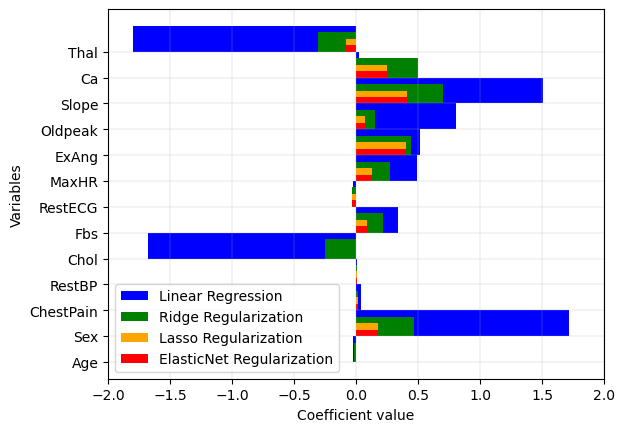

In [41]:
plt.rcdefaults()

plt.barh(logit_x, logit_y, 1.0, align = 'edge', color = "blue", label = "Linear Regression")
plt.barh(logit_ridge_x, logit_ridge_y, 0.75 ,align = 'edge', color = "green", label = "Ridge Regularization")
plt.barh(logit_lasso_x, logit_elasticnet_y, 0.5 ,align = 'edge', color = "orange", label = "Lasso Regularization")
plt.barh(logit_elasticnet_x, logit_elasticnet_y, 0.25 ,align = 'edge', color = "red", label = "ElasticNet Regularization")
plt.grid(linewidth = 0.2)
plt.xlabel("Coefficient value")
plt.ylabel("Variables")
plt.legend(loc = 'best')
plt.xlim(-2, 2)
plt.show()

### 3.14. Nhận xét về các mô hình

Nhận xét về hiệu quả của Logistic Lasso Regression, Logistic ElasticNet Regression, và Logistic Ridge Regression so với Logistic Regression

- 

- 


## 4. Model selection cho Logistic Ridge Regression dùng phương pháp holdout

![holdout_model_selection](./image/holdout_model_selection.JPG)

### 4.1. Chia dữ liệu

In [42]:
# Chia dữ liệu thành 2 tập train_val và test set với tỷ lệ 80/20
X_train_val, X_test, y_train_val, y_test = train_test_split(
    oh_X, y, test_size =0.2, random_state = 1)

# Tiếp theo, chia tập train_val thành 2 tập train và validation set với tỷ lệ 75/25
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size =0.25, random_state = 1)

### 4.2. Huấn luyện mô hình với các giá trị tham số `C` khác nhau

In [43]:
import numpy as np

# Create three lists for train, validation, and test F1-score
train_f1 = []
val_f1 = []
test_f1 = []

# List of hyper-parameter values 
Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e2, 1e3, 1e4]

# Loop over all the C values
for C in Cs:
    # Tạo mô hình Logistic Ridge regression với tham số C
    logit_ridge = LogisticRegression(penalty = 'l2', 
                                      solver = 'saga', 
                                      max_iter = 1e5, 
                                      C = C)

    # Fit mô hình trên train data
    logit_ridge.fit(X_train,y_train)
    
    # Predict trên train set 
    y_train_pred = logit_ridge.predict(X_train)
    
    # Predict trên validation set 
    y_val_pred = logit_ridge.predict(X_train_val)

    # Predict trên test set 
    y_test_pred = logit_ridge.predict(X_test)
    
    # Tính train, validation, và test F1-score
    f1_train = metrics.f1_score(y_true = y_train, y_pred = y_train_pred, average='micro')
    f1_val = metrics.f1_score(y_true = y_train_val, y_pred = y_train_val, average='micro')
    f1_test = metrics.f1_score(y_true = y_test, y_pred= y_test_pred, average='micro')
    
    # Thêm các F1-score vào các list tương ứng
    train_f1.append(f1_train)
    test_f1.append(f1_test)
    val_f1.append(f1_val)
    
    # In ra train, validation, và test F1-score theo C
    print(f'C: {C} | train f1: {np.round(f1_train, 2)} | val f1: {np.round(f1_val, 2)} | test f1: {np.round(f1_test, 2)}')

C: 0.0001 | train f1: 0.68 | val f1: 1.0 | test f1: 0.6
C: 0.001 | train f1: 0.72 | val f1: 1.0 | test f1: 0.67
C: 0.01 | train f1: 0.76 | val f1: 1.0 | test f1: 0.75
C: 0.1 | train f1: 0.82 | val f1: 1.0 | test f1: 0.82
C: 1 | train f1: 0.84 | val f1: 1.0 | test f1: 0.8
C: 10 | train f1: 0.84 | val f1: 1.0 | test f1: 0.8
C: 100.0 | train f1: 0.84 | val f1: 1.0 | test f1: 0.8
C: 1000.0 | train f1: 0.84 | val f1: 1.0 | test f1: 0.8
C: 10000.0 | train f1: 0.84 | val f1: 1.0 | test f1: 0.8


### 4.3. Chọn giá trị `C` cho kết quả tốt nhất trên validation set

In [44]:
# Chọn giá trị C (hyper-parameter), cho val F1-score lớn nhất trên validation data 
best_C = 0.1
# In ra best C (hyper-parameter)
print(f'The best C (hyper-parameter) value, C = {best_C}')

The best C (hyper-parameter) value, C = 0.1


### 4.4. Vẽ biểu đồ train/val/test F1-score theo C

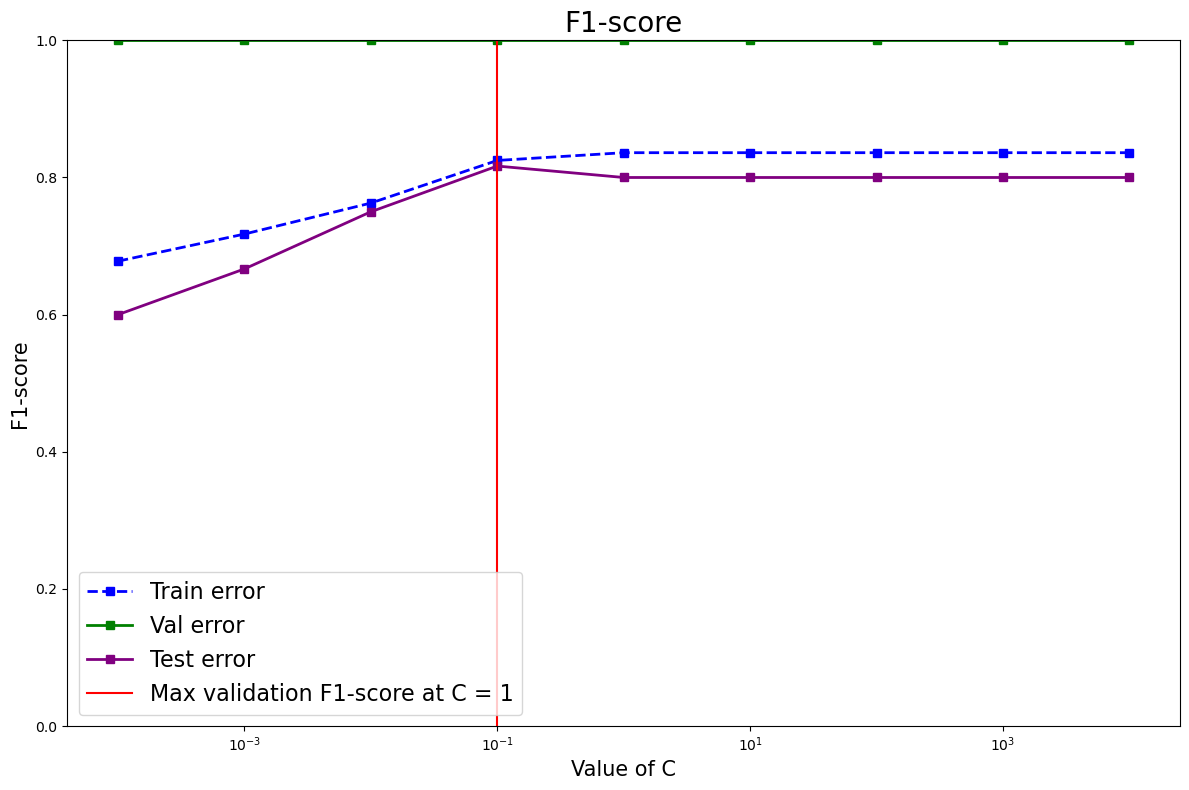

In [45]:
fig, ax = plt.subplots(figsize = (12, 8))

# Vẽ biểu đồ train F1-score theo các giá trị C
ax.plot(Cs, train_f1, 's--', label = 'Train error', color = 'blue', linewidth = 2)

# # Vẽ biểu đồ validation F1-score theo các giá trị C
ax.plot(Cs, val_f1, 's-', label = 'Val error', color ='green', linewidth = 2)

# # Vẽ biểu đồ test F1-score theo các giá trị C
ax.plot(Cs, test_f1, 's-', label = 'Test error', color ='purple', linewidth = 2)

# # Vẽ đường thẳng đứng ứng với best C
ax.axvline(best_C, 0, 1, color = 'r', label = f'Max validation F1-score at C = {1}')

ax.set_xlabel('Value of C', fontsize = 15)
ax.set_ylabel('F1-score', fontsize = 15)
ax.set_ylim([0, 1])
ax.legend(loc = 'lower left', fontsize = 16)
ax.set_title('F1-score', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();

## 5. Model selection cho Lasso Regression dùng phương pháp holdout

### 5.1. Huấn luyện mô hình với các giá trị tham số `C` khác nhau

In [46]:
import numpy as np

# Create three lists for train, validation, and test F1-score
train_f1 = []
val_f1 = []
test_f1 = []

# List of hyper-parameter values 
Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e2, 1e3, 1e4]

# Loop over all the C values
for C in Cs:
    # Tạo mô hình Logistic Ridge regression với tham số C
    logit_lasso = LogisticRegression(penalty='l2', C=C,solver='liblinear', max_iter = 1e5)
    
    
    # Fit mô hình trên train data
    logit_lasso.fit(X_train,y_train)
    
    # Predict trên train set 
    y_train_pred = logit_lasso.predict(X_train)
    
    # Predict trên validation set 
    y_val_pred = logit_lasso.predict(X_train_val)

    # Predict trên test set 
    y_test_pred = logit_lasso.predict(X_test)
    
    # Tính train, validation, và test F1-score
    f1_train = metrics.f1_score(y_true = y_train, y_pred = y_train_pred, average='micro')
    f1_val = metrics.f1_score(y_true = y_train_val, y_pred = y_train_val, average='micro')
    f1_test = metrics.f1_score(y_true = y_test, y_pred= y_test_pred, average='micro')
    
    # Thêm các F1-score vào các list tương ứng
    train_f1.append(f1_train)
    test_f1.append(f1_test)
    val_f1.append(f1_val)
    
    # In ra train, validation, và test F1-score theo C
    print(f'C: {C} | train f1: {np.round(f1_train, 2)} | val f1: {np.round(f1_val, 2)} | test f1: {np.round(f1_test, 2)}')

C: 0.0001 | train f1: 0.68 | val f1: 1.0 | test f1: 0.6
C: 0.001 | train f1: 0.72 | val f1: 1.0 | test f1: 0.67
C: 0.01 | train f1: 0.78 | val f1: 1.0 | test f1: 0.75
C: 0.1 | train f1: 0.86 | val f1: 1.0 | test f1: 0.85
C: 1 | train f1: 0.89 | val f1: 1.0 | test f1: 0.83
C: 10 | train f1: 0.9 | val f1: 1.0 | test f1: 0.8
C: 100.0 | train f1: 0.9 | val f1: 1.0 | test f1: 0.82
C: 1000.0 | train f1: 0.9 | val f1: 1.0 | test f1: 0.82
C: 10000.0 | train f1: 0.9 | val f1: 1.0 | test f1: 0.82


### 5.2. Chọn giá trị C cho kết quả tốt nhất trên validation set

In [47]:
# Chọn giá trị C (hyper-parameter), cho val F1-score nhỏ nhất trên validation data 
best_C = 0.1

# In ra best C (hyper-parameter)
print(f'The best C (hyper-parameter) value, C = {best_C}')

The best C (hyper-parameter) value, C = 0.1


### 5.3. Vẽ biểu đồ train/val/test F1-score theo C

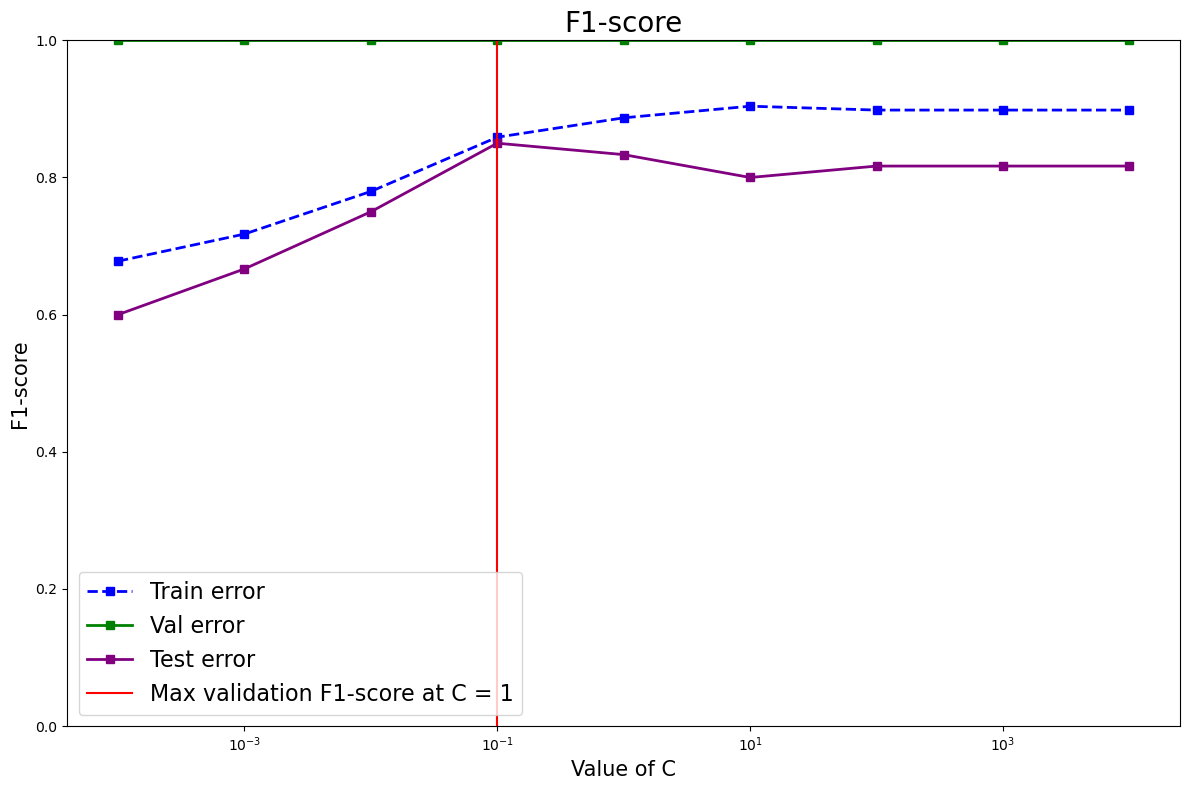

In [48]:
fig, ax = plt.subplots(figsize = (12, 8))

# Vẽ biểu đồ train F1-score theo các giá trị C
ax.plot(Cs, train_f1, 's--', label = 'Train error', color = 'blue', linewidth = 2)

# # Vẽ biểu đồ validation F1-score theo các giá trị C
ax.plot(Cs, val_f1, 's-', label = 'Val error', color ='green', linewidth = 2)

# # Vẽ biểu đồ test F1-score theo các giá trị C
ax.plot(Cs, test_f1, 's-', label = 'Test error', color ='purple', linewidth = 2)

# # Vẽ đường thẳng đứng ứng với best C
ax.axvline(best_C, 0, 1, color = 'r', label = f'Max validation F1-score at C = {1}')

ax.set_xlabel('Value of C', fontsize = 15)
ax.set_ylabel('F1-score', fontsize = 15)
ax.set_ylim([0, 1])
ax.legend(loc = 'lower left', fontsize = 16)
ax.set_title('F1-score', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();

## 6. Model selection cho Logistic Lasso Regression dùng phương pháp cross validation

![k-folds cv model selection](./image/cross_val.png)

### 6.1. Chia dữ liệu

In [49]:
# Chia dữ liệu thành 2 tập train và test set với tỷ lệ 80/20
X_train, X_test, y_train, y_test = train_test_split(
oh_X,y, test_size = 0.2, random_state = 1)

### 6.2. Dùng cross validation cho model selection

In [50]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e2, 1e3, 1e4]

K = 5
kf = KFold(n_splits = K, shuffle = True, random_state = 1)
oh_X=oh_X.values
for C in Cs:
    train_f1s = []
    test_f1s = []
    for train_index, test_index in kf.split(oh_X, y):
        
        # split data theo train_index và test_index
        X_train, X_test = oh_X[train_index], oh_X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Tạo model theo C
        logit_lasso = LogisticRegression(penalty = 'l2', 
                                         C =C,
                                         solver = 'saga', 
                                         max_iter = 1e4, 
                                         fit_intercept = True, 
                                         random_state = 1)
        
        # Fit the model trên train set
        logit_lasso.fit(X_train, y_train)
        
        # Predict trên train và test set
        y_train_pred = logit_lasso.predict(X_train)
        y_test_pred = logit_lasso.predict(X_test)
        
        # Tính train và test F1-score
        train_f1 = f1_score(y_true=y_train, y_pred=y_train_pred)
        test_f1 = f1_score(y_true=y_test,y_pred=y_test_pred)
        
        # Thêm train và test F1-score vào các list tương ứng
        train_f1s.append(train_f1)
        test_f1s.append(test_f1)
    
    # In ra train, validation, và test F1-score theo alpha
    print('C: {:6} | mean(train_f1): {:6} | mean(test_f1): {:6}'.
          format(C, round(train_f1, 2), round(test_f1, 2)))

C: 0.0001 | mean(train_f1):   0.65 | mean(test_f1):   0.63
C:  0.001 | mean(train_f1):   0.67 | mean(test_f1):   0.68
C:   0.01 | mean(train_f1):   0.74 | mean(test_f1):   0.75
C:    0.1 | mean(train_f1):   0.77 | mean(test_f1):   0.82
C:      1 | mean(train_f1):    0.8 | mean(test_f1):   0.82
C:     10 | mean(train_f1):    0.8 | mean(test_f1):   0.86
C:  100.0 | mean(train_f1):    0.8 | mean(test_f1):   0.86
C: 1000.0 | mean(train_f1):    0.8 | mean(test_f1):   0.86
C: 10000.0 | mean(train_f1):    0.8 | mean(test_f1):   0.86


## 7. Naive Bayes

Tham khảo: 

1. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes

2. https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes

### 7.1. Huấn luyện mô hình Multinomial Naive Bayes với sklearn

In [51]:
from sklearn.naive_bayes import MultinomialNB

# Tạo một MultinomialNB model với alpha = 0.01 và fit_prior = True
mnb = MultinomialNB(alpha=0.01, fit_prior=True)
# Chia dữ liệu thành 2 tập train và test set với tỷ lệ 80/20
X_train, X_test, y_train, y_test = train_test_split(
oh_X,y, test_size = 0.2, random_state = 1)

# Fit mô hình trên train data
mnb.fit(X_train, y_train)

# Predict trên test data
y_test_pred = mnb.predict(X_test)

In [52]:
import sklearn.metrics as metrics

cm_test = metrics.confusion_matrix(y_true = y_test, y_pred = y_test_pred)
print(f'The test confusion matrix is:\n {cm_test}')

accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_test_pred)
print(f'The test accuracy is: {accuracy}')

f1_score = metrics.f1_score(y_true = y_test, y_pred = y_test_pred, average = None)
print(f'The test f1_score is: {f1_score}')

f1_micro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred, average = 'micro')
print(f'The test f1_micro is: {f1_micro}')

f1_macro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred, average = 'macro')
print(f'The test f1_macro is: {f1_macro}')

The test confusion matrix is:
 [[22  8]
 [ 6 24]]
The test accuracy is: 0.7666666666666667
The test f1_score is: [0.75862069 0.77419355]
The test f1_micro is: 0.7666666666666667
The test f1_macro is: 0.7664071190211346


### 7.2. Model selection cho MultinomialNB dùng phương pháp cross validation

- Thực hiện các bước tương tự như phần hướng dẫn cho Logistic Regression ở mục 5.

In [53]:
import numpy as np

# Create three lists for train, validation, and test F1-score
train_f1 = []
val_f1 = []
test_f1 = []

# List of hyper-parameter values 
Cs = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 1e2, 1e3, 1e4]

# Loop over all the C values
for C in Cs:
    # Tạo mô hình Logistic Ridge regression với tham số C
    logit_lasso = mnb = MultinomialNB(alpha=C, fit_prior=True)
    
    # Fit mô hình trên train data
    logit_lasso.fit(X_train,y_train)
    
    # Predict trên train set 
    y_train_pred = logit_lasso.predict(X_train)
    
    # Predict trên validation set 
    y_val_pred = logit_lasso.predict(X_train_val)

    # Predict trên test set 
    y_test_pred = logit_lasso.predict(X_test)
    
    # Tính train, validation, và test F1-score
    f1_train = metrics.f1_score(y_true = y_train, y_pred = y_train_pred, average='micro')
    f1_val = metrics.f1_score(y_true = y_train_val, y_pred = y_train_val, average='micro')
    f1_test = metrics.f1_score(y_true = y_test, y_pred= y_test_pred, average='micro')
    
    # Thêm các F1-score vào các list tương ứng
    train_f1.append(f1_train)
    test_f1.append(f1_test)
    val_f1.append(f1_val)
    
    # In ra train, validation, và test F1-score theo C
    print(f'C: {C} | train f1: {np.round(f1_train, 2)} | val f1: {np.round(f1_val, 2)} | test f1: {np.round(f1_test, 2)}')

C: 0.0001 | train f1: 0.79 | val f1: 1.0 | test f1: 0.77
C: 0.001 | train f1: 0.79 | val f1: 1.0 | test f1: 0.77
C: 0.01 | train f1: 0.79 | val f1: 1.0 | test f1: 0.77
C: 0.1 | train f1: 0.79 | val f1: 1.0 | test f1: 0.77
C: 1 | train f1: 0.79 | val f1: 1.0 | test f1: 0.77
C: 10 | train f1: 0.76 | val f1: 1.0 | test f1: 0.78
C: 100.0 | train f1: 0.72 | val f1: 1.0 | test f1: 0.68
C: 1000.0 | train f1: 0.55 | val f1: 1.0 | test f1: 0.5
C: 10000.0 | train f1: 0.55 | val f1: 1.0 | test f1: 0.5


In [54]:
best_C=1

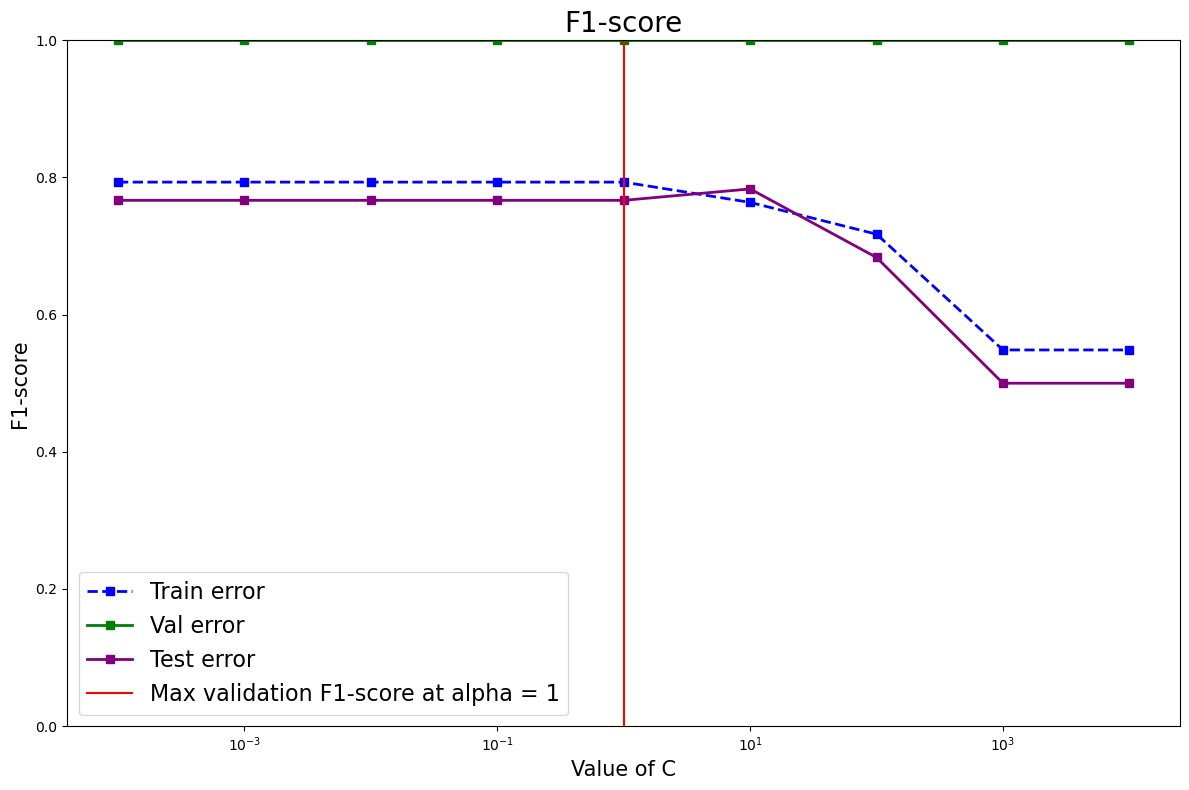

In [55]:
fig, ax = plt.subplots(figsize = (12, 8))

# Vẽ biểu đồ train F1-score theo các giá trị C
ax.plot(Cs, train_f1, 's--', label = 'Train error', color = 'blue', linewidth = 2)

# # Vẽ biểu đồ validation F1-score theo các giá trị C
ax.plot(Cs, val_f1, 's-', label = 'Val error', color ='green', linewidth = 2)

# # Vẽ biểu đồ test F1-score theo các giá trị C
ax.plot(Cs, test_f1, 's-', label = 'Test error', color ='purple', linewidth = 2)

# # Vẽ đường thẳng đứng ứng với best C
ax.axvline(best_C, 0, 1, color = 'r', label = f'Max validation F1-score at alpha = {1}')

ax.set_xlabel('Value of C', fontsize = 15)
ax.set_ylabel('F1-score', fontsize = 15)
ax.set_ylim([0, 1])
ax.legend(loc = 'lower left', fontsize = 16)
ax.set_title('F1-score', fontsize = 20)
ax.set_xscale('log')
plt.tight_layout()
plt.show();